# ANNDA - Lab 1

In [18]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as lines

## 2.2 Implementation of the Delta rule

Setting up the variables

In [25]:
# Adding biais
def with_biais(mat):
    biais = np.ones(shape = (1,mat.shape[1]))
    mat_biais = np.concatenate((mat,biais), axis = 0)
    return(mat_biais)

# Initilaizing the weights
def initialize_weights(n_row, n_col):
    return(np.random.normal(size = (n_row,n_col)))

Defining Delta rule

In [23]:
def delta_rule(patterns, targets, weights, learning_rate):
    delta_weights = - learning_rate * ((weights @ patterns) - targets) @ patterns.T
    return(delta_weights)

def delta_rule_epochs(epochs, patterns, targets, weights, learning_rate = 0.001):
    new_weights = np.array(weights)
    for i in range(epochs):
        delta_weights = delta_rule(patterns, targets, new_weights, learning_rate)
        new_weights += delta_weights
    return(new_weights)

Test with some examples:

In [27]:
# Initializing patterns and targets (example of 'sign of x' problem)
patterns = np.array([[-1,1,-1,1],[-1,-1,1,1]])
patterns_biais = with_biais(patterns)
targets = np.array([-1,1,-1,1])
weights = initialize_weights(1,3)


print('We want to get targets: ', targets)
print('\nInitial random weights: ', weights)
print('Results with intial random weights: ', weights @ patterns_biais)

print('\n... Calculation of new weights for epochs = 20 and learning_rate = 0.001 ...')
new_weights_0001 = delta_rule_epochs(20, patterns_biais, targets, weights, learning_rate = 0.001)
print('New weights: ', new_weights_0001)
print('Result with new weights: ', new_weights_0001 @ patterns_biais)

print('\n... Calculation of new weights for epochs = 20 and learning_rate = 0.01 ...')
new_weights_001 = delta_rule_epochs(20, patterns_biais, targets, weights, learning_rate = 0.01)
print('New weights: ', new_weights_001)
print('Result with new weights: ', new_weights_001 @ patterns_biais)

We want to get targets:  [-1  1 -1  1]

Initial random weights:  [[ 0.68594457 -0.22074741 -0.54022281]]
Results with intial random weights:  [[-1.00541996  0.36646917 -1.44691479 -0.07502566]]

... Calculation of new weights for epochs = 20 and learning_rate = 0.001 ...
New weights:  [[ 0.7101368  -0.20374286 -0.49860851]]
Result with new weights:  [[-1.00500245  0.41527115 -1.41248817  0.00778544]]

... Calculation of new weights for epochs = 20 and learning_rate = 0.01 ...
New weights:  [[ 0.86118673 -0.09757089 -0.2387798 ]]
Result with new weights:  [[-1.00239564  0.71997783 -1.19753743  0.52483604]]


## 2.3 Implementation of a two-layer perceptron

In [28]:
def phi(x):
    return((np.divide(2,(1+np.exp(-x)))-1))

### 2.3.1 The forward  pass

### 2.3.2 The backward pass

### 2.3.3 Weights update

All together:

In [29]:
def fwd_bwd_wup(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
    return(w,v)

Test with XOR example, n_hidden = 

In [30]:
patterns = np.array([[-1,1,-1,1],[-1,-1,1,1]])
targets = np.array([-1,1,1,-1])
n_hidden = 5

w = initialize_weights(n_row = n_hidden, n_col = 3)
v = initialize_weights(n_row = 1, n_col = n_hidden + 1)

def fast_forward(patterns, w, v):
    h_in = w @ with_biais(patterns)
    h_out = with_biais(phi(h_in))
    o_in = v @ h_out
    o_out = phi(o_in)
    return(o_out)

print('First output: \n')
print(fast_forward(patterns, w, v))

First output: 

[[-0.26983783  0.49513702 -0.15700608  0.46045762]]


In [31]:
new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
            eta = 0.01, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)

In [32]:
print('After computation output: \n')
print(fast_forward(patterns, new_w, new_v))

After computation output: 

[[-0.67725781  0.7795639   0.66401326 -0.65972657]]


### 2.4 Monitoring the Learning Process

## 3. Assignment - Part 1

### 3.1 Classification with a single-layer perceptron

#### 3.1.1 Generation of linearly-separable data

In [34]:
n = 100
m_A, sigma_A = [2., 2], 0.5
m_B, sigma_B = [-2., -2.], 0.5
class_A = np.array([np.random.randn(n)*sigma_A + m_A[0], np.random.randn(n)*sigma_A + m_A[1]]).T
class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

# Shuffling
dataset_ini = np.concatenate([class_A, class_B])
classes_ini = np.array([1]*n+[-1]*n)
seq = [i for i in range(len(dataset_ini))]
np.random.shuffle(seq)
dataset = dataset_ini[seq]
classes = classes_ini[seq]


print('class_A shape: ', class_A.shape)
print('class_B shape: ', class_B.shape)

class_A shape:  (100, 2)
class_B shape:  (100, 2)


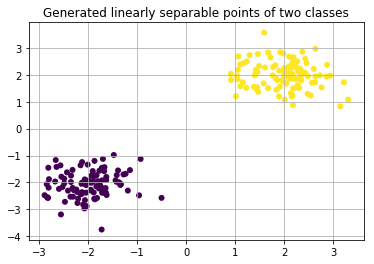

In [35]:
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

#### 3.1.2 Classifcation with a single-layer perceptron and analysis

In [151]:
def learning_perceptron(patterns, targets, weights, eta):
        delta_weights = - eta * (np.sign(weights @ patterns) - targets) @ np.transpose(patterns) / 2
        return(delta_weights)
    
def learning_perceptron_epochs(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))))
        delta_weights = learning_perceptron(patterns, targets, new_weights, eta)
        new_weights += delta_weights
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

def delta_rule_2(patterns, targets, weights, eta):
    delta_weights = - eta * ((weights @ patterns) - targets) @ patterns.T
    return(delta_weights)

def delta_rule_epochs_2(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))))
        delta_weights = delta_rule_2(patterns, targets, new_weights, eta)
        new_weights += delta_weights
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

In [ ]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)

Plotting the animations

In [114]:
def from_Weights_List_To_Points(weights_list, x_lim_min, x_lim_max):
    y_min =  np.array(-weights_list[:,2]/weights_list[:,1] - x_lim_min*weights_list[:,0]/weights_list[:,1])
    y_max =  np.array(-weights_list[:,2]/weights_list[:,0] - x_lim_max*weights_list[:,0]/weights_list[:,1])
    x_min = np.array(x_lim_min*np.ones(len(y_min)))
    x_max = np.array(x_lim_max*np.ones(len(y_max)))
    return(x_min,x_max,y_min,y_max)

x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_lp, -5, 5)
x_min_dr, x_max_dr, y_min_dr, y_max_dr = from_Weights_List_To_Points(weights_list_dr, -5, 5)

In [115]:
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:/FFmpeg/bin/ffmpeg'

def animation_lines(x_min, x_max, y_min, y_max):
    fig, ax = plt.subplots()

    #x = np.arange(0, 2*np.pi, 0.01)
    #line = ax.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]])

    def animate(i):
        ax.clear()
        ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
        ax.set_xlim(left=-5, right = 5)
        ax.set_ylim(bottom=-5, top = 5)
        line = ax.plot([x_min[i], x_max[i]], [y_min[i], y_max[i]])  # update the data
        return line



    ani = animation.FuncAnimation(fig, animate, len(y_min), interval=1000, blit=True)
    return(HTML(ani.to_html5_video()))

For learning perceptron

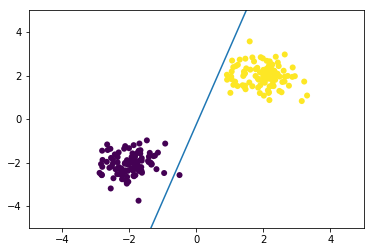

In [116]:
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

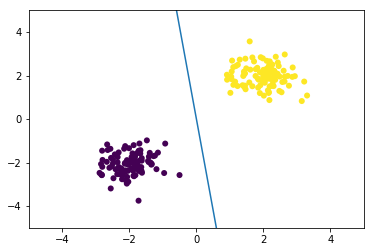

In [119]:
animation_lines(x_min_dr, x_max_dr, y_min_dr, y_max_dr)

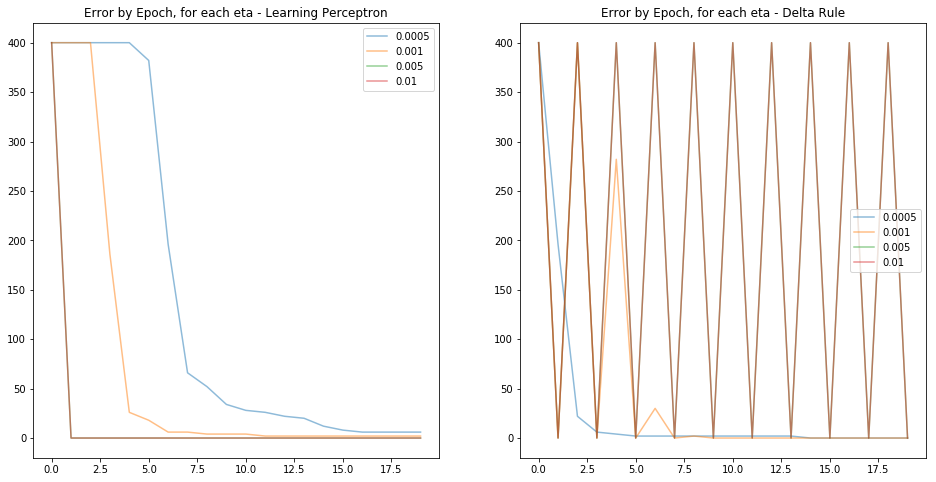

In [170]:
etas = [0.0005, 0.001 ,0.005, 0.01]

error_lp_list = []
error_dr_list = []

fig, axs = plt.subplots(1,2, figsize=(16, 8))

for eta in etas:
    new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    axs[0].plot([i for i in range(len(error_lp))], error_lp, label = eta, alpha = 0.5)
    axs[1].plot([i for i in range(len(error_dr))], error_dr, label = eta, alpha = 0.5)

axs[0].legend()
axs[0].set_title('Error by Epoch, for each eta - Learning Perceptron')
axs[1].legend()
axs[1].set_title('Error by Epoch, for each eta - Delta Rule')
plt.show()

In [153]:
error_dr_list 

[[400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400,
  400],
 [400, 0, 400, 0, 282, 0, 30, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0],
 [400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0,
  400,
  0]]